In [2]:
pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
dataset = pd.read_csv('Churn_Modelling.csv')

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [19]:
## Feature Engineering
geography=pd.get_dummies(x['Geography'])
geography
gender=pd.get_dummies(x['Gender'])
gender

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [20]:
x=x.drop(['Geography','Gender'],axis=1)

In [21]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [22]:
x=pd.concat([x,geography,gender],axis=1)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [28]:
##feature scaling
from sklearn.preprocessing import StandardScaler as sc
sc=sc()

In [29]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -0.57369368,
         1.09168714, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  1.74309049,
         1.09168714, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  1.74309049,
        -0.91601335,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ..., -0.57369368,
        -0.91601335,  0.91601335]])

In [32]:
x_train.shape

(8000, 13)

In [ ]:
## ANN creation

In [35]:
from tensorflow.keras.models import Sequential as sq
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [36]:
##initialize ANN

classifier=sq()

In [39]:
# Add input layer with Dense
classifier.add (Dense(units=11,activation='relu'))

In [40]:
# Add 1st hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [41]:
classifier.add(Dense(units=5, activation='relu'))

In [42]:
#Add output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [48]:
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics='accuracy')

In [49]:
model_history=classifier.fit(x_train, y_train, validation_split=0.33,batch_size=1000, epochs=1000)

Epoch 1/1000
6/6 [==============================] - 1s 34ms/step - loss: 0.3055 - accuracy: 0.8739 - val_loss: 0.3680 - val_accuracy: 0.8516
Epoch 2/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3045 - accuracy: 0.8733 - val_loss: 0.3678 - val_accuracy: 0.8523
Epoch 3/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3047 - accuracy: 0.8737 - val_loss: 0.3679 - val_accuracy: 0.8535
Epoch 4/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3045 - accuracy: 0.8740 - val_loss: 0.3678 - val_accuracy: 0.8527
Epoch 5/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.3043 - accuracy: 0.8733 - val_loss: 0.3682 - val_accuracy: 0.8527
Epoch 6/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3046 - accuracy: 0.8735 - val_loss: 0.3684 - val_accuracy: 0.8519
Epoch 7/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.3043 - accuracy: 0.8746 - val_loss: 0.3683 - val_accuracy: 0.8512
Epoch 8/1000
6/6 [

In [50]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

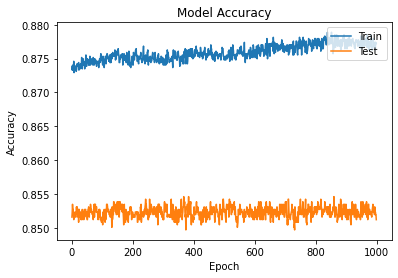

In [51]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'], loc='upper right')
plt.show()

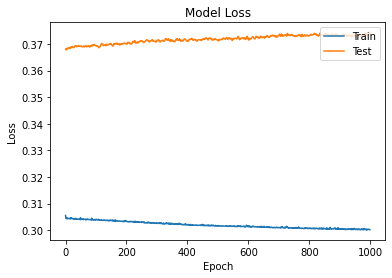

In [52]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'], loc='upper right')
plt.show()

In [53]:
ypred=classifier.predict(x_test)
ypred=(ypred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [55]:
#make confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, ypred)

In [58]:
from sklearn.metrics import accuracy_score
as1=accuracy_score(y_test, ypred)
as1

0.853

In [59]:
#get the weights
classifier.get_weights()

[array([[-3.59638780e-01, -9.50143412e-02, -5.47132082e-02,
          8.91439840e-02,  1.59704108e-02, -9.20483992e-02,
         -1.89263538e-01, -1.37758851e-01, -9.05578509e-02,
          2.82278568e-01,  4.77267653e-02],
        [-8.70179296e-01, -4.23904061e-01,  7.05881596e-01,
         -7.13203430e-01,  6.12870455e-01,  4.69308347e-02,
          1.13586307e+00,  2.39610057e-02,  2.71676838e-01,
          2.01546818e-01,  5.14770746e-01],
        [ 1.47968173e-01,  3.87012303e-01, -3.61351483e-02,
         -4.41764295e-02,  1.15043493e-02,  1.06750108e-01,
          2.48531729e-01,  2.98224300e-01, -3.21397871e-01,
          1.17576569e-01, -2.19779965e-02],
        [ 1.87791586e-01, -8.39901209e-01, -2.94866157e-03,
          3.29810888e-01, -4.72582906e-01, -5.36161900e-01,
         -1.26182199e-01, -5.00334620e-01,  2.79044449e-01,
          7.01901317e-01,  5.33163846e-01],
        [ 6.90631047e-02, -4.74372675e-04,  9.94331658e-01,
          1.67554915e-01, -1.26412481e-01, -